## Objective 

Analyze year over year (YoY) change in spending in grant budget data in the last five (5) fiscal years (FY),FY 18-23, in administrative, instructional, and support services.

In [44]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
#importing data
fy18_grant = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 18 Grant Budget Data.csv")
fy19_grant = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 19 Grant Budget Data.csv")
fy20_grant = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 20 Grant Budget Data.csv")
fy21_grant = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 21 Grant Budget Data.csv")
fy22_grant = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 22 Grant Budget Data .csv")
fy23_grant = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 23 Grant Budget Data.csv")

In [46]:
#aggregating data and creating dataframes for each FY
fy18_grant_agg = fy18_grant.groupby(['FY','Category'])['Expenditures'].sum().reset_index()

fy18_grant_df = pd.DataFrame(fy18_grant_agg)


fy19_grant_agg = fy19_grant.groupby(['FY','Category'])['Expenditures'].sum().reset_index()

fy19_grant_df = pd.DataFrame(fy19_grant_agg)


fy20_grant_agg = fy20_grant.groupby(['FY','Category'])['Expenditures'].sum().reset_index()

fy20_grant_df = pd.DataFrame(fy20_grant_agg)



fy21_grant_agg = fy21_grant.groupby(['FY','Category'])['Expenditures'].sum().reset_index()

fy21_grant_df = pd.DataFrame(fy21_grant_agg)


fy22_grant_agg = fy22_grant.groupby(['FY','Category'])['Expenditures'].sum().reset_index()

fy22_grant_df = pd.DataFrame(fy22_grant_agg)


fy23_grant_agg = fy23_grant.groupby(['FY','Category'])['Expenditures'].sum().reset_index()

fy23_grant_df = pd.DataFrame(fy23_grant_agg)


#concatenating dataframes
grant_data_agg_df = pd.concat([fy18_grant_df,fy19_grant_df,fy20_grant_df,fy21_grant_df,fy22_grant_df,fy23_grant_df])

#subsetting grant_data_agg_df
grant_instructional_df = grant_data_agg_df[grant_data_agg_df['Category'] == 'Instructional']

grant_support_df = grant_data_agg_df[grant_data_agg_df['Category'] == 'Support']

In [49]:
#creating previous year variable to calculate YoY metrics
instructional_previous_yr = grant_instructional_df['Expenditures'].shift(1)
support_previous_yr = grant_support_df['Expenditures'].shift(1)

#creating YoY Changes columns
grant_instructional_df['YoY Change'] = grant_instructional_df['Expenditures'] - instructional_previous_yr
grant_support_df['YoY Change'] = grant_support_df['Expenditures'] - support_previous_yr

#replacing null values in YoY Changes column
grant_instructional_df['YoY Change'] = grant_instructional_df['YoY Change'].fillna(0)
grant_support_df['YoY Change'] = grant_support_df['YoY Change'].fillna(0)

#creating YoY Changes Pct columns
grant_instructional_df['YoY Change Pct'] = round(grant_instructional_df['YoY Change']/instructional_previous_yr,2)
grant_support_df['YoY Change Pct'] = round(grant_support_df['YoY Change']/support_previous_yr,2)

#replacing null values in YoY Changes column
grant_instructional_df['YoY Change Pct'] = grant_instructional_df['YoY Change Pct'].fillna(0)
grant_support_df['YoY Change Pct'] = grant_support_df['YoY Change Pct'].fillna(0)


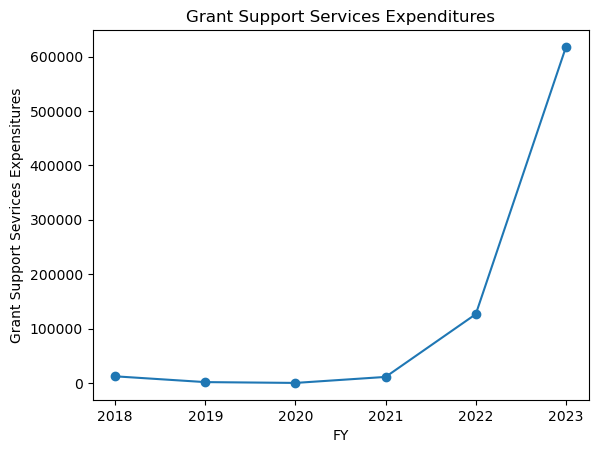

In [48]:
#support services visualization
plt.plot(grant_support_df['FY'],grant_support_df['Expenditures'], marker = 'o')
plt.xlabel('FY')
plt.ylabel('Grant Support Sevrices Expensitures')
plt.title('Grant Support Services Expenditures')
plt.show()

In [35]:
round(grant_support_df['YoY Change'].mean(),2)

100913.81

### Grant Support Services Expenditures

On avergae there is an increase of approximately 100913.81 on grant spending in support services YoY. The largest increase on support services was from FY 22 to FY 23, an increase of 491214.61, an increase of nearly 400%.

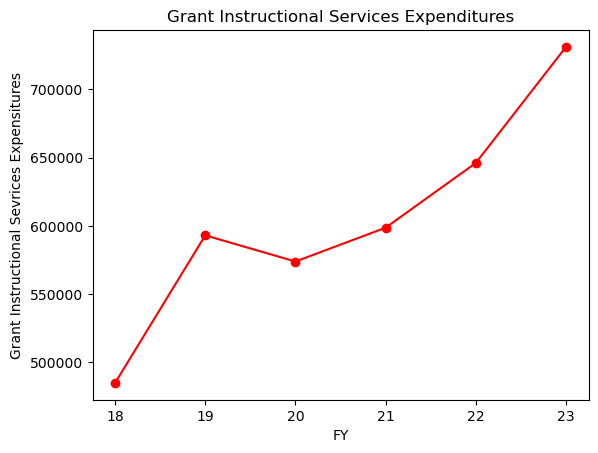

In [40]:
#instructional services visualization
plt.plot(grant_instructional_df['FY'],grant_instructional_df['Expenditures'], marker = 'o', color = 'red')
plt.xlabel('FY')
plt.ylabel('Grant Instructional Sevrices Expensitures')
plt.title('Grant Instructional Services Expenditures')
plt.show()

In [39]:
round(grant_instructional_df[['YoY Change', 'YoY Change Pct']].mean(),2)

YoY Change        41012.29
YoY Change Pct        0.07
dtype: float64

### Grant Instructional Services Expenditures

On average there is an increase of approximately 41012.29, 7%, on instructional support services YoY. The largest increase on instructional services spending was from FY 18 to FY 19, an increase of 108062.35, 22%.